In [1]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
nanog_profile_wn_contribs.shape

(55233, 1000, 4)

In [34]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

/mnt/lab_data2/avanti/tfmodisco
commit fc94c49b655860add857d759e7f76e5141b4d72a (HEAD -> variablelenseqletidentification, origin/variablelenseqletidentification)
Author: AvantiShri <avanti.shrikumar@gmail.com>
Date:   Mon Dec 28 02:16:38 2020 -0800

    cap on size of agkm embedding and sorting by avg imp per base
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1


In [4]:
%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)

%matplotlib inline

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/avanti/anaconda3/lib/python3

num seqs to use: 1104
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.003840833756548818
Computing threshold
Subsampling!
For increasing = True , the minimum IR precision was 0.3821878027706028 occurring at 0.0 implying a frac_neg of 0.6186148549422282
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.3181812734441475 occurring at -2.1047890186309814e-07 implying a frac_neg of 0.46666549487634684
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.0166471004486084  and  0.10987591743469238 with frac passing 0.172683
Final raw thresholds are -0.0166471004486084  and  0.10987591743469238
Final transformed thresholds are -0.519914596273292  and  0.8315744232475599


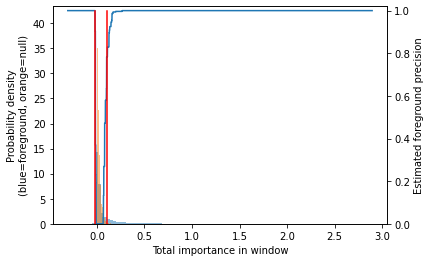

Got 8954 coords
After resolving overlaps, got 8954 seqlets
Across all tasks, the weakest transformed threshold used was: 0.519814596273292
MEMORY 3.170807808
8954 identified in total
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.519814596273292
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [8292, 662]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 3.171336192


In [5]:
import modisco
from collections import OrderedDict
import sys


def print_memory_use():
    import os
    import psutil
    process = psutil.Process(os.getpid())
    print("MEMORY",process.memory_info().rss/1000000000)

FRAC_SEQS_TO_USE = 0.02
NUM_SEQS_TO_USE = int(FRAC_SEQS_TO_USE*len(nanog_profile_wn_contribs))
print("num seqs to use:", NUM_SEQS_TO_USE)

task_names=["Nanog_profile_wn"]
contrib_scores={'Nanog_profile_wn':
                 nanog_profile_wn_contribs[:NUM_SEQS_TO_USE]}
hypothetical_contribs={'Nanog_profile_wn':
                       nanog_profile_wn_hypimp[:NUM_SEQS_TO_USE]}
one_hot=onehot_seq[:NUM_SEQS_TO_USE]
#null_tracks should either be a dictionary
# from task_name to 1d trakcs, or a callable
null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(
    num_to_samp=10000)
revcomp = True
plot_save_dir = "figures"

sliding_window_size = 21
flank_size = 10
histogram_bins = 100
percentiles_in_bandwidth = 10
overlap_portion = 0.5
min_metacluster_size = 100
min_metacluster_size_frac = 0.01
weak_threshold_for_counting_sign = 0.8
target_seqlet_fdr = 0.2
min_passing_windows_frac = 0.03
max_passing_windows_frac = 0.2
separate_pos_neg_thresholds = False
verbose = True
min_seqlets_per_task = None
other_tracks = []
#reducing from 50000 to 10000 for debugging purposes
max_seqlets_per_metacluster = 10000 #50000

overlap_resolver = modisco.core.SeqletsOverlapResolver(
    overlap_detector=modisco.core.CoordOverlapDetector(overlap_portion),
    seqlet_comparator=modisco.core.SeqletComparator(
       value_provider=
        modisco.value_provider.CoorScoreValueProvider()))

coord_producer = modisco.coordproducers.FixedWindowAroundChunks(
    sliding=sliding_window_size,
    flank=flank_size,
    suppress=(int(0.5*sliding_window_size)
              + flank_size),
    target_fdr=target_seqlet_fdr,
    min_passing_windows_frac=min_passing_windows_frac,
    max_passing_windows_frac=max_passing_windows_frac,
    separate_pos_neg_thresholds=separate_pos_neg_thresholds,
    max_seqlets_total=None,
    verbose=verbose,
    plot_save_dir=plot_save_dir) 

track_set = (modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=task_names,
    contrib_scores=contrib_scores,
    hypothetical_contribs=hypothetical_contribs,
    one_hot=one_hot,
    revcomp=revcomp,
    other_tracks=other_tracks))

per_position_contrib_scores = OrderedDict([
    (x, [np.sum(s,axis=1) for s in contrib_scores[x]])
    for x in task_names])

multitask_seqlet_creation_results = modisco.core.MultiTaskSeqletCreator(
    coord_producer=coord_producer,
    overlap_resolver=overlap_resolver)(
        task_name_to_score_track=per_position_contrib_scores,
        null_tracks=null_per_pos_scores,
        track_set=track_set)

#find the weakest transformed threshold used across all tasks
weakest_transformed_thresh = (min(
    [min(x.tnt_results.transformed_pos_threshold,
         abs(x.tnt_results.transformed_neg_threshold))
         for x in (multitask_seqlet_creation_results.
                   task_name_to_coord_producer_results.values())]) -
    0.0001) #subtract 1e-4 to avoid weird numerical issues
print("Across all tasks, the weakest transformed threshold used"
      +" was: "+str(weakest_transformed_thresh))
print_memory_use()

all_seqlets = multitask_seqlet_creation_results.final_seqlets
print(str(len(all_seqlets))+" identified in total")
if (len(all_seqlets) < 100):
    print("WARNING: you found relatively few seqlets."
          +" Consider dropping target_seqlet_fdr") 

if int(min_metacluster_size_frac * len(all_seqlets)) > min_metacluster_size:
    print("min_metacluster_size_frac * len(seqlets) = {0} is more than min_metacluster_size={1}.".\
          format(int(min_metacluster_size_frac * len(all_seqlets)), min_metacluster_size))
    print("Using it as a new min_metacluster_size")
    min_metacluster_size = int(min_metacluster_size_frac * len(all_seqlets))

weak_threshold_for_counting_sign=0.8
if (weak_threshold_for_counting_sign is None):
    weak_threshold_for_counting_sign = weakest_transformed_thresh
else:
    weak_threshold_for_counting_sign =\
        weak_threshold_for_counting_sign
    
if (weak_threshold_for_counting_sign > weakest_transformed_thresh):
    print("Reducing weak_threshold_for_counting_sign to"
          +" match weakest_transformed_thresh, from "
          +str(weak_threshold_for_counting_sign)
          +" to "+str(weakest_transformed_thresh))
    weak_threshold_for_counting_sign = weakest_transformed_thresh

task_name_to_value_provider = OrderedDict([
    (task_name,
     modisco.value_provider.TransformCentralWindowValueProvider(
        track_name=task_name+"_contrib_scores",
        central_window=sliding_window_size,
        val_transformer= 
         coord_producer_results.tnt_results.val_transformer))
     for (task_name,coord_producer_results)
         in (multitask_seqlet_creation_results.
             task_name_to_coord_producer_results.items())])

min_metacluster_size=100
metaclusterer = modisco.metaclusterers.SignBasedPatternClustering(
                        min_cluster_size=min_metacluster_size,
                        task_name_to_value_provider=
                            task_name_to_value_provider,
                        task_names=task_names,
                        threshold_for_counting_sign=
                            weakest_transformed_thresh,
                        weak_threshold_for_counting_sign=
                            weak_threshold_for_counting_sign)

metaclustering_results = metaclusterer.fit_transform(all_seqlets)
metacluster_indices = np.array(
    metaclustering_results.metacluster_indices)
metacluster_idx_to_activity_pattern =\
    metaclustering_results.metacluster_idx_to_activity_pattern

num_metaclusters = max(metacluster_indices)+1
metacluster_sizes = [np.sum(metacluster_idx==metacluster_indices)
                      for metacluster_idx in range(num_metaclusters)]
if (verbose):
    print("Metacluster sizes: ",metacluster_sizes)
    print("Idx to activities: ",metacluster_idx_to_activity_pattern)
    print_memory_use()
    sys.stdout.flush()

In [7]:
metacluster_idx = 0
metacluster_size = metacluster_sizes[metacluster_idx]
print("On metacluster "+str(metacluster_idx))                       
if (max_seqlets_per_metacluster is None                        
    or max_seqlets_per_metacluster >= metacluster_size):       
    print("Metacluster size", metacluster_size)                     
else:                                                               
    print("Metacluster size {0} limited to {1}".format(             
            metacluster_size, max_seqlets_per_metacluster))    
sys.stdout.flush()                                                  
metacluster_activities = [                                          
    int(x) for x in                                                 
    metacluster_idx_to_activity_pattern[metacluster_idx].split(",")]
assert len(all_seqlets)==len(metacluster_indices)                       
metacluster_seqlets = [                                             
    x[0] for x in zip(all_seqlets, metacluster_indices)                 
    if x[1]==metacluster_idx][:max_seqlets_per_metacluster]    
relevant_task_names, relevant_task_signs =\
    zip(*[(x[0], x[1]) for x in                                     
        zip(task_names, metacluster_activities) if x[1] != 0])      
print('Relevant tasks: ', relevant_task_names)                      
print('Relevant signs: ', relevant_task_signs)                      
sys.stdout.flush()                                                  
if (len(relevant_task_names) == 0):                                 
    assert False, "This should not happen"                          
    sys.stdout.flush()                                              

onehot_track_name="sequence"
contrib_scores_track_names = [key+"_contrib_scores" for key in relevant_task_names]
hypothetical_contribs_track_names= [key+"_hypothetical_contribs" for key in relevant_task_names]                
track_signs=relevant_task_signs                              
other_comparison_track_names=[]



assert len(track_signs)==len(hypothetical_contribs_track_names)         
assert len(track_signs)==len(contrib_scores_track_names)                
                                                                                
seqlets_sorter = (lambda arr:                                           
                          sorted(arr,                                           
                                 key=lambda x:                                  
                                  -np.sum([np.sum(np.abs(x[track_name].fwd))    
                                     for track_name                             
                                     in contrib_scores_track_names])))

min_overlap_while_sliding = 0.7
pattern_comparison_settings =\
            modisco.affinitymat.core.PatternComparisonSettings(                         
                track_names=hypothetical_contribs_track_names                   
                            +contrib_scores_track_names                         
                            +other_comparison_track_names,                      
                track_transformer=modisco.affinitymat.L1Normalizer(),                   
                min_overlap=min_overlap_while_sliding)

from importlib import reload
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
reload(modisco.seqlet_embedding)
reload(modisco)

#coarse_grained 1d embedder   
embedder_factory=(modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=10)) #default: maxentries 500
seqlets_to_1d_embedder = embedder_factory(                         
        onehot_track_name=onehot_track_name,                            
        toscore_track_names_and_signs=list(                             
        zip(hypothetical_contribs_track_names,                          
            [np.sign(x) for x in track_signs])))

#affinity matrix from embeddings                                        
coarse_affmat_computer =\
    modisco.affinitymat.core.AffmatFromSeqletEmbeddings(                        
        seqlets_to_1d_embedder=seqlets_to_1d_embedder,                  
        affinity_mat_from_1d=\
            modisco.affinitymat.core.NumpyCosineSimilarity(                     
                verbose=True),                                   
        verbose=True)                                           

affmat_from_seqlets_with_nn_pairs =\
    modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(                      
        pattern_comparison_settings=pattern_comparison_settings,        
        sim_metric_on_nn_pairs=\
            modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(           
                n_cores=10,                                   
                cross_metric_single_region=                             
                    modisco.affinitymat.core.CrossContinJaccardSingleRegion()))

seqlets = seqlets_sorter(metacluster_seqlets)
print("Computing coarse affmat", flush=True)
coarse_affmat = coarse_affmat_computer(seqlets)


On metacluster 0
Metacluster size 8292
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 280 tasks      | elapsed:    8.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   13.5s
[Parallel(n_jobs=10)]: Done 1480 tasks      | elapsed:   20.1s
[Parallel(n_jobs=10)]: Done 2380 tasks      | elapsed:   29.0s
[Parallel(n_jobs=10)]: Done 3480 tasks      | elapsed:   38.5s
[Parallel(n_jobs=10)]: Done 4780 tasks      | elapsed:   50.9s
[Parallel(n_jobs=10)]: Done 6280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 7980 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.4min remaining:    0.2s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.4min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.5s
[P

Constructing csr matrix...
csr matrix made in 2.3048431873321533 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   30.8s finished


Constructing csr matrix...
csr matrix made in 2.2752742767333984 s
Finished embedding computation in 234.9 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:21<00:00,  1.24s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:20<00:00,  1.22s/it]


Finished affinity matrix computations in 44.08 s


In [8]:
def reconstitute_dense_affmat(sparse_affmat_withargmax, seqlet_neighbors):
    to_return = np.zeros((len(seqlet_neighbors), len(seqlet_neighbors)))
    for row_idx, (neighbors, affinitieswithargmax) in enumerate(zip(seqlet_neighbors, sparse_affmat_withargmax)):
        affinities = affinitieswithargmax[:,0]
        for col_idx, val in zip(neighbors, affinities):
            to_return[row_idx, col_idx] = val
    return to_return


def get_correlations(main_affmat, other_affmat):
    correlations = []
    for main_affmat_row, other_affmat_row\
        in zip(main_affmat, other_affmat):
        #compare correlation on the nonzero rows
        to_compare_mask = np.abs(main_affmat_row) > 0
        corr = scipy.stats.spearmanr(
                main_affmat_row[to_compare_mask],
                other_affmat_row[to_compare_mask])
        correlations.append(corr.correlation)
    correlations = np.array(correlations)
    return correlations


seqlet_neighbors = (modisco.tfmodisco_workflow.seqlets_to_patterns
    .get_seqlet_neighbors_with_initcluster(       
        nearest_neighbors_to_compute=500,                         
        coarse_affmat=coarse_affmat,                                
        initclusters=None))

affmat_from_seqlets_with_nn_pairs_argmax =\
    modisco.affinitymat.core.AffmatFromSeqletsWithNNpairs(
        pattern_comparison_settings=pattern_comparison_settings,
        sim_metric_on_nn_pairs=\
            modisco.affinitymat.core.ParallelCpuCrossMetricOnNNpairs(
                n_cores=10,
                cross_metric_single_region=
                    modisco.affinitymat.core.CrossContinJaccardSingleRegionWithArgmax()))

sparse_nn_affmat_withargmax = affmat_from_seqlets_with_nn_pairs_argmax(
    seqlet_neighbors=seqlet_neighbors,
    seqlets=seqlets[:len(coarse_affmat)],
    return_sparse=True)

dense_finegrained_nn_affmat = reconstitute_dense_affmat(
                    sparse_affmat_withargmax=sparse_nn_affmat_withargmax,
                    seqlet_neighbors=seqlet_neighbors[:len(sparse_nn_affmat_withargmax)])


Launching nearest neighbors affmat calculation job
MEMORY 5.584289792
Parallel runs completed
MEMORY 5.692874752
Job completed in: 60.92 s
MEMORY 5.692874752
Launching nearest neighbors affmat calculation job
MEMORY 5.692874752
Parallel runs completed
MEMORY 5.764067328
Job completed in: 60.88 s
MEMORY 5.764067328


NameError: name 'scipy' is not defined

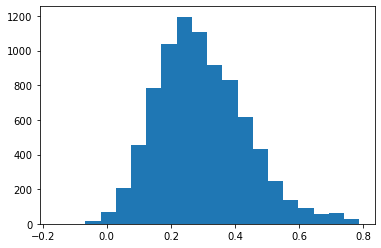

In [9]:
import scipy

correlations_advanced_gapped = get_correlations(main_affmat=dense_finegrained_nn_affmat,
                                                other_affmat=coarse_affmat)


from matplotlib import pyplot as plt
plt.hist(correlations_advanced_gapped, bins=20)
plt.show()

In [17]:
#coarse_grained 1d embedder   
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
reload(modisco.seqlet_embedding)
reload(modisco)
embedder_factory_nolimit=(modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=10, max_entries=100000000000))
seqlets_to_1d_embedder_nolimit = embedder_factory_nolimit(                         
        onehot_track_name=onehot_track_name,                            
        toscore_track_names_and_signs=list(                             
        zip(hypothetical_contribs_track_names,                          
            [np.sign(x) for x in track_signs])))

#affinity matrix from embeddings                            
coarse_affmat_computer_nolimit =\
    modisco.affinitymat.core.AffmatFromSeqletEmbeddings(                        
        seqlets_to_1d_embedder=seqlets_to_1d_embedder_nolimit,                  
        affinity_mat_from_1d=\
            modisco.affinitymat.core.NumpyCosineSimilarity(                     
                verbose=True),                                   
        verbose=True)

print("Computing coarse affmat 2", flush=True)
coarse_affmat_nolimit = coarse_affmat_computer_nolimit(seqlets)

Computing coarse affmat 2
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    8.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   15.4s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   23.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   34.7s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   47.3s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  3.3min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]

Constructing csr matrix...
csr matrix made in 12.47719931602478 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:  2.7min finished


Constructing csr matrix...
csr matrix made in 12.674288034439087 s
Finished embedding computation in 784.04 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [01:07<00:00,  3.99s/it]


Batching in slices of size 500


100%|██████████| 17/17 [01:07<00:00,  3.99s/it]


Finished affinity matrix computations in 138.74 s


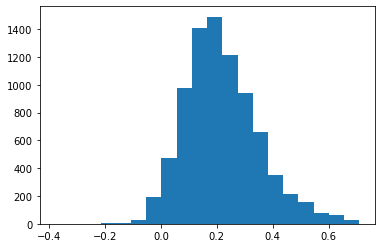

In [18]:
import scipy

correlations_advanced_gapped_nolimit = get_correlations(main_affmat=dense_finegrained_nn_affmat,
                                                        other_affmat=coarse_affmat_nolimit)

from matplotlib import pyplot as plt
plt.hist(correlations_advanced_gapped_nolimit, bins=20)
plt.show()

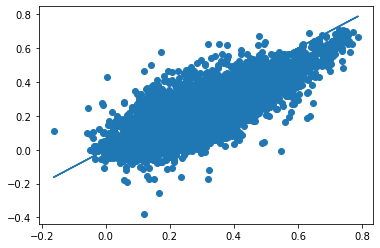

In [20]:
plt.scatter(correlations_advanced_gapped, correlations_advanced_gapped_nolimit)
plt.plot(correlations_advanced_gapped, correlations_advanced_gapped)
plt.show()

In [21]:
#coarse_grained 1d embedder   
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
reload(modisco.seqlet_embedding)
reload(modisco)

#removed the normalization by the length of the k for the seqlet importance
embedder_factory_nodivbylen =(modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=10))
seqlets_to_1d_embedder_nodivbylen = embedder_factory_nodivbylen(                         
        onehot_track_name=onehot_track_name,                            
        toscore_track_names_and_signs=list(                             
        zip(hypothetical_contribs_track_names,                          
            [np.sign(x) for x in track_signs])))

#affinity matrix from embeddings                            
coarse_affmat_computer_nodivbylen =\
    modisco.affinitymat.core.AffmatFromSeqletEmbeddings(                        
        seqlets_to_1d_embedder=seqlets_to_1d_embedder_nodivbylen,                  
        affinity_mat_from_1d=\
            modisco.affinitymat.core.NumpyCosineSimilarity(                     
                verbose=True),                                   
        verbose=True)

print("Computing coarse affmat 2", flush=True)
coarse_affmat_nodivbylen = coarse_affmat_computer_nodivbylen(seqlets)

Computing coarse affmat 2
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 270 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 770 tasks      | elapsed:   12.8s
[Parallel(n_jobs=10)]: Done 1470 tasks      | elapsed:   19.4s
[Parallel(n_jobs=10)]: Done 2370 tasks      | elapsed:   28.1s
[Parallel(n_jobs=10)]: Done 3470 tasks      | elapsed:   37.7s
[Parallel(n_jobs=10)]: Done 4770 tasks      | elapsed:   49.8s
[Parallel(n_jobs=10)]: Done 6270 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 7970 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.4min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.8s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    8.6s
[Parallel(n_jobs=10)]: 

Constructing csr matrix...
csr matrix made in 2.3757762908935547 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   32.9s finished


Constructing csr matrix...
csr matrix made in 2.3251399993896484 s
Finished embedding computation in 243.36 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:22<00:00,  1.29s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:21<00:00,  1.28s/it]


Finished affinity matrix computations in 45.95 s


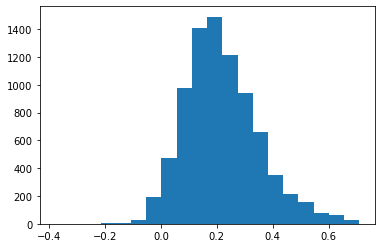

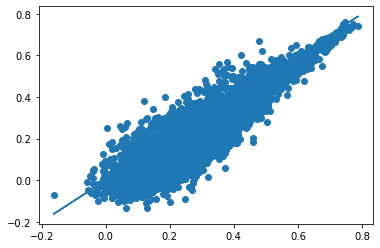

In [28]:
import scipy

correlations_advanced_gapped_nodivbylen = get_correlations(main_affmat=dense_finegrained_nn_affmat,
                                                           other_affmat=coarse_affmat_nodivbylen)

from matplotlib import pyplot as plt
plt.hist(correlations_advanced_gapped_nodivlen, bins=20)
plt.show()

plt.scatter(correlations_advanced_gapped, correlations_advanced_gapped_nodivbylen)
plt.plot(correlations_advanced_gapped, correlations_advanced_gapped)
plt.show()

500
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done 290 tasks      | elapsed:    6.8s
[Parallel(n_jobs=10)]: Done 790 tasks      | elapsed:   12.0s
[Parallel(n_jobs=10)]: Done 1490 tasks      | elapsed:   18.4s
[Parallel(n_jobs=10)]: Done 2390 tasks      | elapsed:   27.3s
[Parallel(n_jobs=10)]: Done 3490 tasks      | elapsed:   36.6s
[Parallel(n_jobs=10)]: Done 4790 tasks      | elapsed:   48.2s
[Parallel(n_jobs=10)]: Done 6290 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 7990 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.3min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.5s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: 

Constructing csr matrix...
csr matrix made in 2.3241448402404785 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   30.5s finished


Constructing csr matrix...
csr matrix made in 2.2792210578918457 s
Finished embedding computation in 230.82 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:21<00:00,  1.27s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:21<00:00,  1.27s/it]


Finished affinity matrix computations in 45.3 s
0.2808040174630818


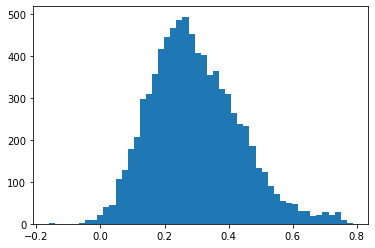

1000
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    4.6s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:   10.8s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   19.9s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   30.6s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:   44.1s
[Parallel(n_jobs=10)]: Done 4840 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 6340 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 8040 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.7min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    4.6s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:   12.3s
[Parallel(n_jobs=10)]: 

Constructing csr matrix...
csr matrix made in 4.649617671966553 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:  1.0min finished


Constructing csr matrix...
csr matrix made in 4.58598518371582 s
Finished embedding computation in 352.96 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:31<00:00,  1.85s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:31<00:00,  1.83s/it]


Finished affinity matrix computations in 64.97 s
0.25184679247083525


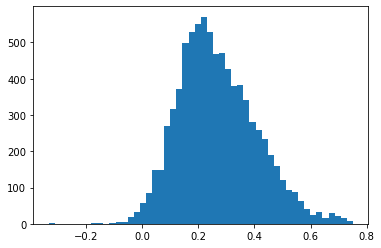

2000
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    6.4s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:   15.0s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   27.6s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   42.6s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 4540 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 5290 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 6140 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 7090 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 8140 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  2.4min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]

Constructing csr matrix...
csr matrix made in 8.23009991645813 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:  1.7min finished


Constructing csr matrix...
csr matrix made in 8.314472198486328 s
Finished embedding computation in 553.01 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:48<00:00,  2.85s/it]


Batching in slices of size 500


100%|██████████| 17/17 [00:48<00:00,  2.88s/it]


Finished affinity matrix computations in 100.19 s
0.2227041057327576


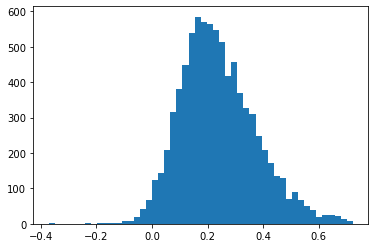

In [30]:
#coarse_grained 1d embedder   
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
reload(modisco.seqlet_embedding)
reload(modisco)

def get_coarse_affmat(max_entries):
    embedder_factory =(modisco.seqlet_embedding
                             .advanced_gapped_kmer
                             .AdvancedGappedKmerEmbedderFactory(n_jobs=10, max_entries=max_entries))
    seqlets_to_1d_embedder = embedder_factory(                         
            onehot_track_name=onehot_track_name,                            
            toscore_track_names_and_signs=list(                
            zip(hypothetical_contribs_track_names,                          
                [np.sign(x) for x in track_signs])))

    #affinity matrix from embeddings                            
    coarse_affmat_computer =\
        modisco.affinitymat.core.AffmatFromSeqletEmbeddings(              
            seqlets_to_1d_embedder=seqlets_to_1d_embedder,                  
            affinity_mat_from_1d=\
                modisco.affinitymat.core.NumpyCosineSimilarity(                     
                    verbose=True),                                   
            verbose=True)
    print("Computing coarse affmat", flush=True)
    coarse_affmat = coarse_affmat_computer(seqlets)
    return coarse_affmat
    
maxentries_to_coarseaffmat = {}
maxentries_to_correlations = {}
for maxentries in [500, 1000, 2000]:
    print(maxentries)
    maxentries_to_coarseaffmat[maxentries] = get_coarse_affmat(max_entries=maxentries)
    maxentries_to_correlations[maxentries] = get_correlations(main_affmat=dense_finegrained_nn_affmat,
                                                               other_affmat=maxentries_to_coarseaffmat[maxentries])
    print(np.median(maxentries_to_correlations[maxentries]))
    from matplotlib import pyplot as plt
    plt.hist(maxentries_to_correlations[maxentries], bins=50)
    plt.show()

100
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 500 tasks      | elapsed:    8.5s
[Parallel(n_jobs=10)]: Done 1500 tasks      | elapsed:   14.9s
[Parallel(n_jobs=10)]: Done 2900 tasks      | elapsed:   23.2s
[Parallel(n_jobs=10)]: Done 4700 tasks      | elapsed:   33.7s
[Parallel(n_jobs=10)]: Done 6900 tasks      | elapsed:   46.4s
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:   54.7s remaining:    0.1s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:   54.9s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 620 tasks      | elapsed:    4.4s
[Parallel(n_jobs=10)]: Done 1620 tasks      | elapsed:   10.7s
[Parallel(n_jobs=10)]: Done 3020 tasks      | elapsed:   19.4s
[Parallel(n_jobs=10)]: Done 4820 tasks      | elapsed:   29.3s
[

Constructing csr matrix...
csr matrix made in 0.48943209648132324 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:    6.6s finished


Constructing csr matrix...
csr matrix made in 0.4833536148071289 s
Finished embedding computation in 120.64 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:14<00:00,  1.16it/s]

Batching in slices of size 500



100%|██████████| 17/17 [00:14<00:00,  1.15it/s]


Finished affinity matrix computations in 31.5 s
0.2658445440053504


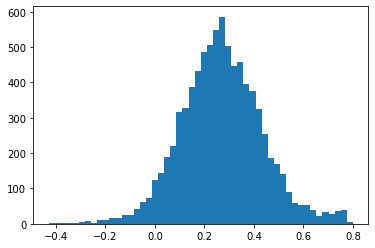

250
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 620 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done 1620 tasks      | elapsed:   12.8s
[Parallel(n_jobs=10)]: Done 3020 tasks      | elapsed:   22.6s
[Parallel(n_jobs=10)]: Done 4820 tasks      | elapsed:   35.4s
[Parallel(n_jobs=10)]: Done 7020 tasks      | elapsed:   51.0s
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.0min remaining:    0.1s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.0min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 620 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done 1620 tasks      | elapsed:   13.3s
[Parallel(n_jobs=10)]: Done 3020 tasks      | elapsed:   23.2s
[Parallel(n_jobs=10)]: Done 4820 tasks      | elapsed:   36.2s
[

Constructing csr matrix...
csr matrix made in 1.1676666736602783 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   15.8s finished


Constructing csr matrix...
csr matrix made in 1.15327787399292 s
Finished embedding computation in 158.13 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:16<00:00,  1.00it/s]

Batching in slices of size 500



100%|██████████| 17/17 [00:16<00:00,  1.02it/s]


Finished affinity matrix computations in 35.72 s
0.2894133645060477


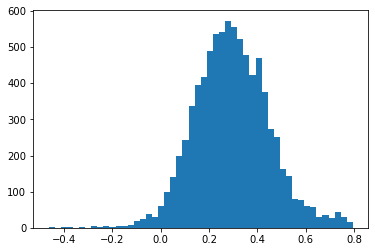

In [32]:
for maxentries in [100, 250]:
    print(maxentries)
    maxentries_to_coarseaffmat[maxentries] = get_coarse_affmat(max_entries=maxentries)
    maxentries_to_correlations[maxentries] = get_correlations(main_affmat=dense_finegrained_nn_affmat,
                                                               other_affmat=maxentries_to_coarseaffmat[maxentries])
    print(np.median(maxentries_to_correlations[maxentries]))
    from matplotlib import pyplot as plt
    plt.hist(maxentries_to_correlations[maxentries], bins=50)
    plt.show()

300
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 500 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 1500 tasks      | elapsed:   17.0s
[Parallel(n_jobs=10)]: Done 2900 tasks      | elapsed:   28.0s
[Parallel(n_jobs=10)]: Done 4700 tasks      | elapsed:   40.6s
[Parallel(n_jobs=10)]: Done 6900 tasks      | elapsed:   56.8s
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.1min remaining:    0.2s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.1min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    6.9s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   12.3s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   19.9s
[P

Constructing csr matrix...
csr matrix made in 1.4369113445281982 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   17.9s finished


Constructing csr matrix...
csr matrix made in 1.3688220977783203 s
Finished embedding computation in 176.08 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:17<00:00,  1.05s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:17<00:00,  1.04s/it]


Finished affinity matrix computations in 37.66 s
0.291147267218551


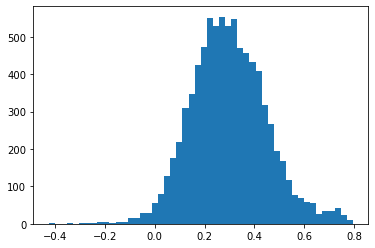

400
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.6s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    7.9s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   13.8s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   21.6s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:   30.7s
[Parallel(n_jobs=10)]: Done 4840 tasks      | elapsed:   40.6s
[Parallel(n_jobs=10)]: Done 6340 tasks      | elapsed:   52.4s
[Parallel(n_jobs=10)]: Done 8040 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.1min remaining:    0.2s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.2min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    4.1s
[P

Constructing csr matrix...
csr matrix made in 1.8216056823730469 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   23.9s finished


Constructing csr matrix...
csr matrix made in 1.8206660747528076 s
Finished embedding computation in 197.92 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:18<00:00,  1.10s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:18<00:00,  1.09s/it]


Finished affinity matrix computations in 39.25 s
0.2891714578810507


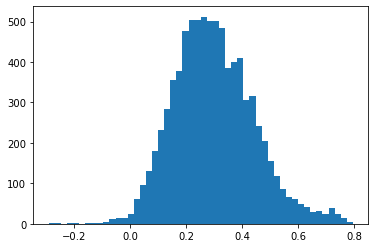

500
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.6s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   15.1s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   23.3s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:   33.2s
[Parallel(n_jobs=10)]: Done 4840 tasks      | elapsed:   44.8s
[Parallel(n_jobs=10)]: Done 6340 tasks      | elapsed:   58.2s
[Parallel(n_jobs=10)]: Done 8040 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.3min remaining:    0.2s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.3min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.5s
[P

Constructing csr matrix...
csr matrix made in 2.296592950820923 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   31.3s finished


Constructing csr matrix...
csr matrix made in 2.286167860031128 s
Finished embedding computation in 228.09 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:21<00:00,  1.29s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:21<00:00,  1.26s/it]


Finished affinity matrix computations in 45.54 s
0.2808040174630818


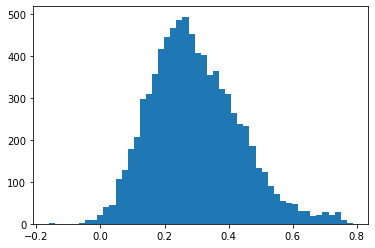

600
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.7s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    8.7s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   16.2s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   24.8s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:   35.5s
[Parallel(n_jobs=10)]: Done 4840 tasks      | elapsed:   47.9s
[Parallel(n_jobs=10)]: Done 6340 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 8040 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.4min remaining:    0.2s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.4min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.7s
[P

Constructing csr matrix...
csr matrix made in 2.792893648147583 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   37.4s finished


Constructing csr matrix...
csr matrix made in 2.769777774810791 s
Finished embedding computation in 253.87 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:23<00:00,  1.39s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:23<00:00,  1.37s/it]


Finished affinity matrix computations in 49.28 s
0.27355979674117903


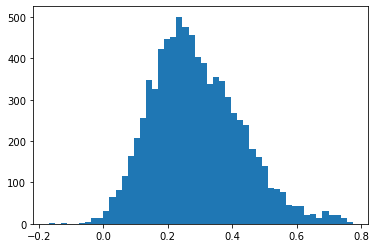

700
Computing coarse affmat
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:    9.2s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   17.2s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   26.3s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:   37.6s
[Parallel(n_jobs=10)]: Done 4840 tasks      | elapsed:   50.9s
[Parallel(n_jobs=10)]: Done 6340 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 8040 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 8273 out of 8292 | elapsed:  1.5min remaining:    0.2s
[Parallel(n_jobs=10)]: Done 8292 out of 8292 | elapsed:  1.5min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    4.1s
[P

Constructing csr matrix...
csr matrix made in 3.2256438732147217 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8292 out of 8292 | elapsed:   43.0s finished


Constructing csr matrix...
csr matrix made in 3.1728456020355225 s
Finished embedding computation in 278.48 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 17/17 [00:24<00:00,  1.45s/it]

Batching in slices of size 500



100%|██████████| 17/17 [00:24<00:00,  1.45s/it]


Finished affinity matrix computations in 51.63 s
0.26781220030059405


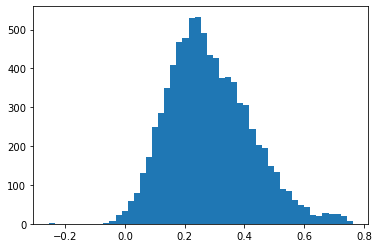

In [33]:
for maxentries in [300,400,500,600,700]:
    print(maxentries)
    maxentries_to_coarseaffmat[maxentries] = get_coarse_affmat(max_entries=maxentries)
    maxentries_to_correlations[maxentries] = get_correlations(main_affmat=dense_finegrained_nn_affmat,
                                                               other_affmat=maxentries_to_coarseaffmat[maxentries])
    print(np.median(maxentries_to_correlations[maxentries]))
    from matplotlib import pyplot as plt
    plt.hist(maxentries_to_correlations[maxentries], bins=50)
    plt.show()

Perform filtering

In [ ]:
AFFMAT_CORRELATION_THRESHOLD=0.15
filter_mask_from_correlation =\
            modisco.affinitymat.core.FilterMaskFromCorrelation(
                correlation_threshold=AFFMAT_CORRELATION_THRESHOLD,
                verbose=True)
filtered_rows_mask = filter_mask_from_correlation(
                            main_affmat=dense_finegrained_nn_affmat,
                            other_affmat=coarse_affmat)
filtered_seqlets = [x[0] for x in
                    zip(seqlets[:len(coarse_affmat)], filtered_rows_mask) if (x[1])]
filtered_dense_finegrained_nn_affmat =\
    dense_finegrained_nn_affmat[filtered_rows_mask][:,filtered_rows_mask]

Compare clustering with and without filtering

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from collections import Counter

tsne_perplexity = 10
aff_to_dist_mat = modisco.affinitymat.transformers.AffToDistViaInvLogistic()
density_adapted_affmat_transformer =(
            modisco.affinitymat.transformers.TsneConditionalProbs(                      
                    perplexity=tsne_perplexity,                                
                    aff_to_dist_mat=aff_to_dist_mat))
affmat_transformer = modisco.affinitymat.transformers.SymmetrizeByAddition(probability_normalize=True)
clusterer = modisco.cluster.core.LeidenCluster(                         
                affmat_transformer=affmat_transformer,                       
                contin_runs=50,
                n_leiden_iterations=-1,
                verbose=True)

dense_nn_distmat = aff_to_dist_mat(dense_finegrained_nn_affmat)
filtered_dense_nn_distmat = aff_to_dist_mat(filtered_dense_finegrained_nn_affmat)
embedding = TSNE(verbose=2, perplexity=30, metric="precomputed",
                 random_state=1234).fit_transform(dense_nn_distmat)
filtered_embedding = TSNE(verbose=2, perplexity=30, metric="precomputed",
                          random_state=1234).fit_transform(filtered_dense_nn_distmat)
from matplotlib import pyplot as plt
print("Without filtering")
plt.gca().scatter(*zip(*embedding), alpha=0.05)
plt.show()
print("With filtering")
plt.gca().scatter(*zip(*filtered_embedding), alpha=0.05)
plt.show()


print("Without filtering:")
cluster_results = clusterer(
    density_adapted_affmat_transformer(dense_finegrained_nn_affmat),
    initclusters=None)
plt.gca().scatter(*zip(*embedding), alpha=0.05, c=cluster_results.cluster_indices)
plt.show()
print(Counter(cluster_results.cluster_indices))

print("With filtering:")
filtered_cluster_results = clusterer(
    density_adapted_affmat_transformer(filtered_dense_finegrained_nn_affmat),
    initclusters=None)
plt.gca().scatter(*zip(*filtered_embedding), alpha=0.05,
                  c=filtered_cluster_results.cluster_indices)
plt.show()
print(Counter(filtered_cluster_results.cluster_indices))

In [ ]:
from collections import defaultdict
from modisco.visualization import viz_sequence

initial_flank_to_add = 10
trim_to_window_size = 30
frac_support_to_trim_to = 0.2
min_num_to_trim_to = 7
expand_trim_expand1 = modisco.aggregator.ExpandSeqletsToFillPattern(
                track_set=track_set,                                            
                flank_to_add=initial_flank_to_add).chain(
            modisco.aggregator.TrimToBestWindow(                                        
                window_size=trim_to_window_size,                           
                track_names=contrib_scores_track_names)).chain(
            modisco.aggregator.ExpandSeqletsToFillPattern(
                track_set=track_set,                   
                flank_to_add=initial_flank_to_add))
postprocessor1 = modisco.aggregator.TrimToFracSupport(
                        min_frac=frac_support_to_trim_to,                  
                        min_num=min_num_to_trim_to,                        
                        verbose=True).chain(expand_trim_expand1)
seqlet_aggregator = modisco.aggregator.GreedySeqletAggregator(
            pattern_aligner=modisco.core.CrossContinJaccardPatternAligner(
                pattern_comparison_settings=pattern_comparison_settings),       
                seqlet_sort_metric=                                             
                    lambda x: -sum([np.sum(np.abs(x[track_name].fwd)) for       
                               track_name in contrib_scores_track_names]),      
            postprocessor=postprocessor1)

def sign_consistency_func(motif):
    motif_track_signs = [
        np.sign(np.sum(motif[contrib_scores_track_name].fwd)) for
        contrib_scores_track_name in contrib_scores_track_names]
    return all([(x==y) for x,y in
                zip(motif_track_signs, track_signs)])


def get_cluster_to_aggregate_motif(seqlets, cluster_indices,
                                   sign_consistency_check,
                                   min_seqlets_in_motif):                   
    num_clusters = max(cluster_indices+1)
    cluster_to_seqlets = defaultdict(list)
    assert len(seqlets)==len(cluster_indices)
    for seqlet,idx in zip(seqlets, cluster_indices):
        cluster_to_seqlets[idx].append(seqlet)
    cluster_to_motif = OrderedDict()
    cluster_to_eliminated_motif = OrderedDict()
    
    for i in range(num_clusters):
        if (len(cluster_to_seqlets[i]) >= min_seqlets_in_motif):
            print("Aggregating for cluster "+str(i)+" with "
                  +str(len(cluster_to_seqlets[i]))+" seqlets")
            sys.stdout.flush()
            motifs = seqlet_aggregator(cluster_to_seqlets[i])
            assert len(motifs)<=1
            if (len(motifs) > 0):
                motif = motifs[0]
                if (sign_consistency_check==False or
                    sign_consistency_func(motif)):
                    cluster_to_motif[i] = motif
                else:
                    print("Dropping cluster "+str(i)+
                          " with "+str(motif.num_seqlets)
                          +" seqlets due to sign disagreement")
                    cluster_to_eliminated_motif[i] = motif
            cluster_to_motif[i] = motif
    return cluster_to_motif, cluster_to_eliminated_motif

def print_clusters(cluster_to_motif, embedding, cluster_results):
    for idx in sorted(cluster_to_motif.keys()):
        print("cluster idx",idx, "seqlets", len(cluster_to_motif[idx].seqlets))
        plt.scatter(*zip(*embedding[cluster_results.cluster_indices==idx]),
                    color="red", alpha=0.05)
        plt.scatter(*zip(*embedding[cluster_results.cluster_indices!=idx]),
                    color="blue", alpha=0.05)
        plt.show()
        viz_sequence.plot_weights(cluster_to_motif[idx]["Nanog_profile_wn_contrib_scores"].fwd)
        viz_sequence.plot_weights(cluster_to_motif[idx]["sequence"].fwd)


print("Without filtering")
prefilter_cluster_to_motif, _ = get_cluster_to_aggregate_motif(
    seqlets=seqlets[:len(coarse_affmat)],
    cluster_indices=cluster_results.cluster_indices,
    sign_consistency_check=True,
    min_seqlets_in_motif=0)
print_clusters(prefilter_cluster_to_motif, embedding,
               cluster_results)

print("With filtering")
r1_cluster_to_motif, r1_cluster_to_eliminated_motifs =\
    get_cluster_to_aggregate_motif(
        seqlets=filtered_seqlets,
        cluster_indices=filtered_cluster_results.cluster_indices,
        sign_consistency_check=True,
        min_seqlets_in_motif=0)
print_clusters(r1_cluster_to_motif, filtered_embedding,
               filtered_cluster_results)

In [ ]:
import gc
gc.collect()

In [ ]:
#get the coordinates of cluster 12, 226 (filtered)

ESRRB_CLUSTER=12
motif = filtered_cluster_to_motif[ESRRB_CLUSTER]
viz_sequence.plot_weights(motif["sequence"].fwd)

motif_seqlets = motif.seqlets
with open("esrrb_2pcseqlets_hits.txt",'w') as fh:
    fh.write("\n".join("\t".join(
        
        [str(x.coor.example_idx), str(x.coor.start+10), str(x.coor.start+17)] if x.coor.is_revcomp==False else
        [str(x.coor.example_idx), str(x.coor.end-17), str(x.coor.end-10)]  
    ) for x in motif_seqlets) )

In [ ]:
!head esrrb_2pcseqlets_hits.txt

In [ ]:
#obtain unique seqlets from adjusted motifs
r2_seqlets = list(dict([(y.exidx_start_end_string, y)
                   for x in r1_cluster_to_motif.values()
                   for y in x.seqlets]).values())
print("Num filtered seqles was:",len(filtered_seqlets))
print("Num r2 seqlets:",len(r2_seqlets))

In [ ]:
print("Computing r2 coarse affmat", flush=True)
r2_coarse_affmat = coarse_affmat_computer(r2_seqlets)

In [ ]:
r2_seqlet_neighbors = (modisco.tfmodisco_workflow.seqlets_to_patterns
    .get_seqlet_neighbors_with_initcluster(       
        nearest_neighbors_to_compute=500,                         
        coarse_affmat=r2_coarse_affmat,                                
        initclusters=None))

In [ ]:
r2_sparse_nn_affmat_withargmax = affmat_from_seqlets_with_nn_pairs_argmax(
    seqlet_neighbors=r2_seqlet_neighbors,
    seqlets=r2_seqlets[:len(r2_coarse_affmat)],
    return_sparse=True)
r2_dense_finegrained_nn_affmat = reconstitute_dense_affmat(
                    sparse_affmat_withargmax=r2_sparse_nn_affmat_withargmax,
                    seqlet_neighbors=r2_seqlet_neighbors[:len(r2_sparse_nn_affmat_withargmax)])
r2_correlations_advanced_gapped = get_correlations(main_affmat=r2_dense_finegrained_nn_affmat,
                                                   other_affmat=r2_coarse_affmat)
from matplotlib import pyplot as plt
plt.hist(r2_correlations_advanced_gapped, bins=20)
plt.show()

In [ ]:
r2_filtered_rows_mask = filter_mask_from_correlation(
                            main_affmat=r2_dense_finegrained_nn_affmat,
                            other_affmat=r2_coarse_affmat)
r2_filtered_seqlets = [x[0] for x in
                       zip(r2_seqlets[:len(r2_coarse_affmat)],
                           r2_filtered_rows_mask) if (x[1])]
r2_filtered_dense_finegrained_nn_affmat =\
    r2_dense_finegrained_nn_affmat[r2_filtered_rows_mask][:,r2_filtered_rows_mask]

In [ ]:
r2_filtered_dense_nn_distmat = aff_to_dist_mat(r2_filtered_dense_finegrained_nn_affmat)
r2_filtered_embedding = TSNE(verbose=2, perplexity=30, metric="precomputed",
                             random_state=1234).fit_transform(r2_filtered_dense_nn_distmat)

In [ ]:
r2_filtered_cluster_results = clusterer(
    density_adapted_affmat_transformer(r2_filtered_dense_finegrained_nn_affmat),
    initclusters=None)
plt.gca().scatter(*zip(*r2_filtered_embedding), alpha=0.05,
                  c=r2_filtered_cluster_results.cluster_indices)
plt.show()
print(Counter(r2_filtered_cluster_results.cluster_indices))

In [ ]:
r2_cluster_to_motif, r2_cluster_to_eliminated_motifs =\
    get_cluster_to_aggregate_motif(
        seqlets=r2_filtered_seqlets,
        cluster_indices=r2_filtered_cluster_results.cluster_indices,
        sign_consistency_check=True,
        min_seqlets_in_motif=0)
print_clusters(r2_cluster_to_motif, r2_filtered_embedding,
               r2_filtered_cluster_results)

In [ ]:
esrrb_r1_seqlets = filtered_cluster_to_motif[ESRRB_CLUSTER].seqlets
esrrb_r1_seqlet_coords = set([(x.coor.example_idx, x.coor.start, x.coor.end)
                             for x in esrrb_r1_seqlets])

In [ ]:
isr1esrrb_r2seqlets = np.array([True if ((x.coor.example_idx, x.coor.start, x.coor.end)
                                in esrrb_r1_seqlet_coords)
                                else False for x in r2_seqlets])
isr1esrrb_r2filteredseqlets = np.array([True if ((x.coor.example_idx, x.coor.start, x.coor.end)
                                in esrrb_r1_seqlet_coords)
                                else False for x in r2_filtered_seqlets])

In [ ]:
plt.gca().scatter(*zip(*r2_filtered_embedding), alpha=0.05,
                  c=isr1esrrb_r2filteredseqlets)

In [ ]:
reload(modisco.aggregator)
BG_FREQ = np.mean(onehot_seq[:NUM_SEQS_TO_USE], axis=(0,1))


def adhoc_get_cluster_to_aggregate_motif_breakdownagg(
    seqlets, cluster_indices, sign_consistency_check, min_seqlets_in_motif):  
    
    ag1 = modisco.aggregator.GreedySeqletAggregator(
            pattern_aligner=modisco.core.CrossContinJaccardPatternAligner(
                pattern_comparison_settings=pattern_comparison_settings),       
                seqlet_sort_metric=                                             
                    lambda x: -sum([np.sum(np.abs(x[track_name].fwd)) for       
                               track_name in contrib_scores_track_names]),      
            postprocessor=lambda x: x)
    pp1 = modisco.aggregator.TrimToFracSupport(
                        min_frac=frac_support_to_trim_to,                  
                        min_num=min_num_to_trim_to,                        
                        verbose=True)
    pp2 = modisco.aggregator.ExpandSeqletsToFillPattern(
                track_set=track_set,                                            
                flank_to_add=initial_flank_to_add)
    pp3 = modisco.aggregator.TrimToBestWindowByIC(                                        
                window_size=trim_to_window_size,
                onehot_track_name="sequence",
                bg_freq=BG_FREQ
                #track_names=contrib_scores_track_names
    )
    pp4 = modisco.aggregator.ExpandSeqletsToFillPattern(
                track_set=track_set,                   
                flank_to_add=initial_flank_to_add)
    pps = [pp1,pp2,pp3,pp4]
    
    num_clusters = max(cluster_indices+1)
    cluster_to_seqlets = defaultdict(list)
    assert len(seqlets)==len(cluster_indices)
    for seqlet,idx in zip(seqlets, cluster_indices):
        cluster_to_seqlets[idx].append(seqlet)
    cluster_to_motif = OrderedDict()
    cluster_to_eliminated_motif = OrderedDict()
    
    for i in range(num_clusters):
        if (i==10):
            if (len(cluster_to_seqlets[i]) >= min_seqlets_in_motif):
                print("Aggregating for cluster "+str(i)+" with "
                      +str(len(cluster_to_seqlets[i]))+" seqlets")
                sys.stdout.flush()
                motifs = ag1(cluster_to_seqlets[i])
                assert len(motifs)<=1
                viz_sequence.plot_weights(motifs[0]["Nanog_profile_wn_contrib_scores"].fwd)
                for ppidx,pp in enumerate(pps):
                    motifs = pp(motifs)
                    print("postprocessing",ppidx)
                    viz_sequence.plot_weights(motifs[0]["Nanog_profile_wn_contrib_scores"].fwd)
                if (len(motifs) > 0):
                    motif = motifs[0]                
                    if (sign_consistency_check==False or
                        sign_consistency_func(motif)):
                        cluster_to_motif[i] = motif
                    else:
                        print("Dropping cluster "+str(i)+
                              " with "+str(motif.num_seqlets)
                              +" seqlets due to sign disagreement")
                        cluster_to_eliminated_motif[i] = motif
                cluster_to_motif[i] = motif
    return cluster_to_motif, cluster_to_eliminated_motif

adhoc_get_cluster_to_aggregate_motif_breakdownagg(
        seqlets=r2_filtered_seqlets,
        cluster_indices=r2_filtered_cluster_results.cluster_indices,
        sign_consistency_check=True,
        min_seqlets_in_motif=0)

In [ ]:
for seqletidx in np.nonzero(isr1esrrb_r2filteredseqlets)[0][:10]:
    viz_sequence.plot_weights(r2_filtered_seqlets[seqletidx]["Nanog_profile_wn_contrib_scores"].fwd)

In [ ]:
for aseqlet in r2_filtered_cluster_results

In [ ]:
np.sum(isr1esrrb_r2filteredseqlets)

In [ ]:
#Where the esrrb seqlets go??
with open("agkm_r2_goingin.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start), str(x.coor.end)])
        for x in r2_seqlets) )
    
with open("agkm_r2_laststage.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start), str(x.coor.end)])
        for x in r2_filtered_seqlets) )
    
with open("agkm_r2_esrrb_hits.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start), str(x.coor.end)])
        for y in [10]
        for x in r2_cluster_to_motif[y].seqlets))

with open("agkm_r2_allpattern_hits.txt",'w') as fh:
    fh.write("\n".join("\t".join([
        str(x.coor.example_idx), str(x.coor.start), str(x.coor.end), str(yidx)])
        for yidx,y in r2_cluster_to_motif.items()
        for x in y.seqlets ))


In [ ]:
!wc -l <esrrb_2pcseqlets_hits.txt

In [ ]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_r2_goingin.txt | wc -l

In [ ]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_r2_laststage.txt | wc -l

In [ ]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_r2_allpattern_hits.txt | wc -l

In [ ]:
!bedtools intersect -wa -u -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_r2_esrrb_hits.txt | wc -l

In [ ]:
!bedtools intersect -loj -f 1 -a esrrb_2pcseqlets_hits.txt -b agkm_r2_allpattern_hits.txt > tmp_hits.txt

In [ ]:
!cat tmp_hits.txt

In [ ]:
for aseqlet in r2_cluster_to_motif[10].seqlets[:20]:
    viz_sequence.plot_weights(aseqlet["Nanog_profile_wn_contrib_scores"].fwd)